In [1]:
import pandas as pd

In [2]:
macbook = pd.read_csv('macbook.csv')
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


In [3]:
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

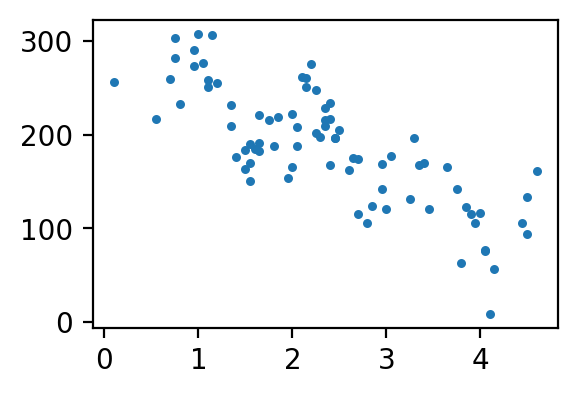

In [6]:
plt.figure(figsize=(3,2))
plt.scatter(macbook['used_years'], macbook['price'], s=5)
plt.show()

In [7]:
import numpy as np

# np.corrcoef(x, y)를 사용합니다.
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

In [8]:
x = macbook["used_years"].values
x = macbook["price"].values

In [9]:
def model(x, w, b):
    y = w * x + b
    return y

In [10]:
model(x=5, w=2, b=1)

11

In [11]:
model(x=6, w=-20, b=140)

20

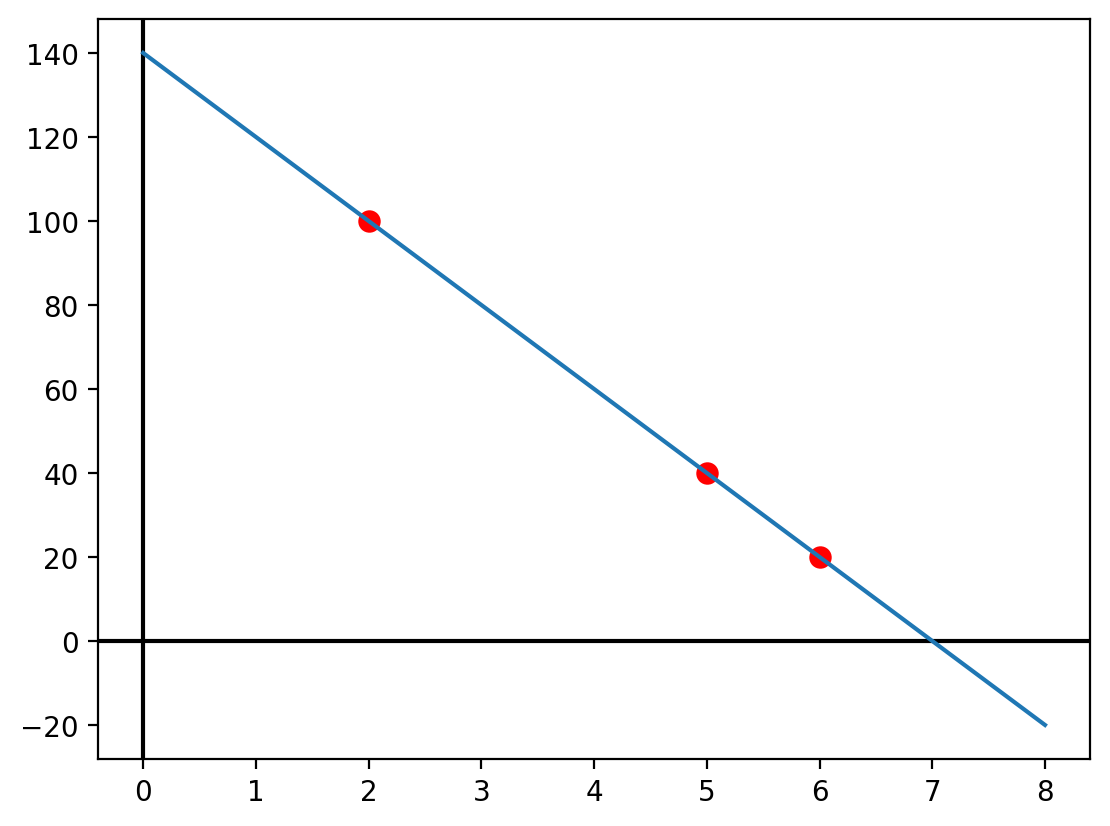

In [12]:
# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b 일차함수 그리기
x = np.linspace(0, 8, 9)
y = model(x, w=-20, b=140) # y = -20x + 140
plt.plot(y)

# 나의 (x, y) 점 찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)

plt.show()

# 1-4

In [13]:
w = 3.1
b = 2.3

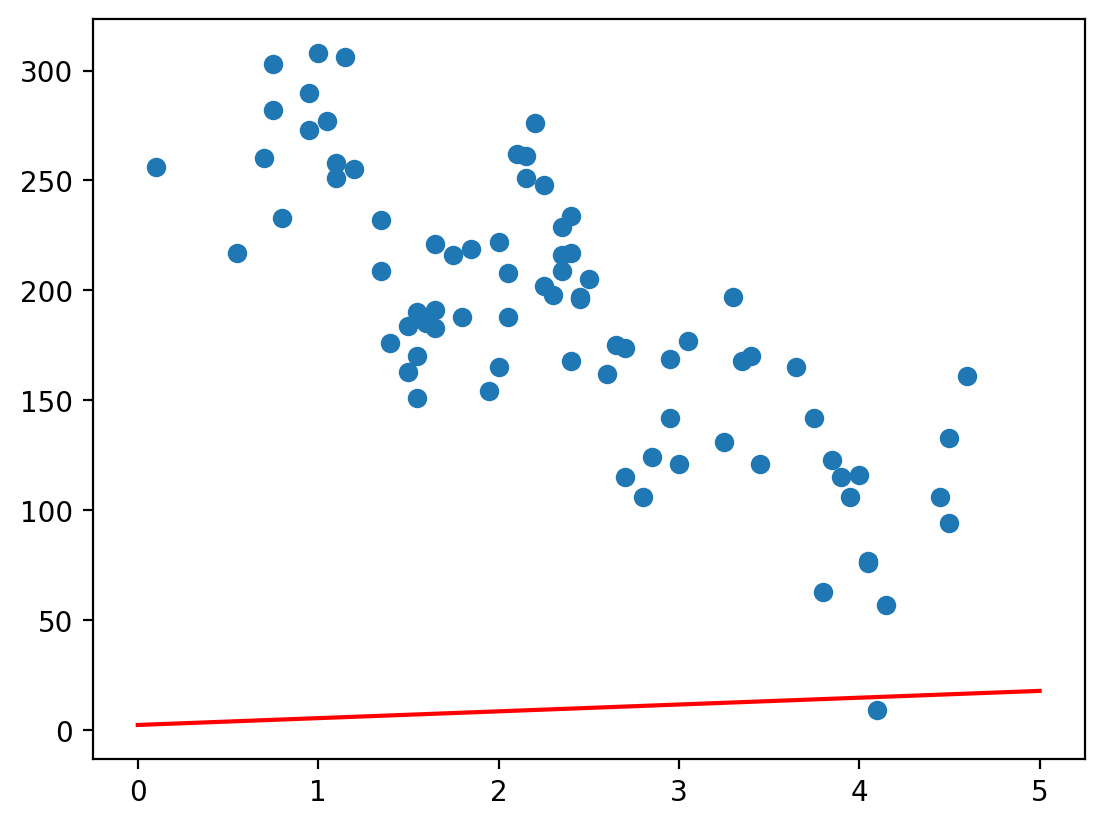

In [14]:
x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [16]:
x = macbook["used_years"].values

In [17]:
prediction = model(x, w, b)
prediction

array([10.515, 14.08 ,  5.245, 16.25 , 16.095, 10.67 , 11.755,  9.275,
        9.43 ,  8.035,  6.95 ,  5.245, 10.36 ,  4.005,  8.655,  4.625,
       14.545, 10.98 ,  8.655,  5.865,  6.485, 12.685,  6.485,  9.895,
        9.74 ,  2.61 , 12.995,  9.585,  4.47 ,  5.555,  7.725, 15.01 ,
       16.25 , 14.7  ,  8.5  ,  9.895, 10.05 ,  8.81 , 11.6  , 14.855,
       10.67 ,  8.965, 12.53 ,  9.74 , 11.135,  7.415,  7.105,  8.965,
       12.84 ,  7.105,  4.78 , 11.445,  9.74 ,  6.64 ,  7.415,  9.275,
       14.235, 14.39 , 16.56 ,  9.585, 14.855,  6.02 ,  8.345,  7.26 ,
        8.5  ,  7.88 , 13.925, 13.615,  9.585,  9.12 ,  5.4  , 15.165,
        5.71 ,  7.105, 11.445,  6.95 ,  7.415,  5.71 , 12.375,  4.625])

In [18]:
macbook['prediction'] = prediction
macbook.head()

,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


In [19]:
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


In [20]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()
    rmse = mse ** 0.5
    return rmse

In [21]:
x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x, w, b)
print(predictions)

[10.515 14.08   5.245 16.25  16.095 10.67  11.755  9.275  9.43   8.035
  6.95   5.245 10.36   4.005  8.655  4.625 14.545 10.98   8.655  5.865
  6.485 12.685  6.485  9.895  9.74   2.61  12.995  9.585  4.47   5.555
  7.725 15.01  16.25  14.7    8.5    9.895 10.05   8.81  11.6   14.855
 10.67   8.965 12.53   9.74  11.135  7.415  7.105  8.965 12.84   7.105
  4.78  11.445  9.74   6.64   7.415  9.275 14.235 14.39  16.56   9.585
 14.855  6.02   8.345  7.26   8.5    7.88  13.925 13.615  9.585  9.12
  5.4   15.165  5.71   7.105 11.445  6.95   7.415  5.71  12.375  4.625]


In [22]:
rmse = RMSE(prediction, y)
print(rmse)

188.81322969819274


In [23]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

In [24]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

In [25]:
LEARNING_RATE = 1

In [26]:
x = macbook["used_years"].values
y = macbook["price"].values

In [27]:
w = 3.1
b = 2.3

In [28]:
losses = []

In [29]:
for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(x, w, b, y)
    losses.append(L)
    if i % 100 == 0:
        print('iteration %d : Loss %0.4f' % (i, L))

iteration 100 : Loss 108.0080
iteration 200 : Loss 94.5709
iteration 300 : Loss 81.8560
iteration 400 : Loss 70.1799
iteration 500 : Loss 59.9778
iteration 600 : Loss 51.7475
iteration 700 : Loss 45.8356
iteration 800 : Loss 42.1474
iteration 900 : Loss 40.1357
iteration 1000 : Loss 39.1420
iteration 1100 : Loss 38.6793
iteration 1200 : Loss 38.4703
iteration 1300 : Loss 38.3772
iteration 1400 : Loss 38.3360
iteration 1500 : Loss 38.3179
iteration 1600 : Loss 38.3099
iteration 1700 : Loss 38.3064
iteration 1800 : Loss 38.3048
iteration 1900 : Loss 38.3041
iteration 2000 : Loss 38.3038


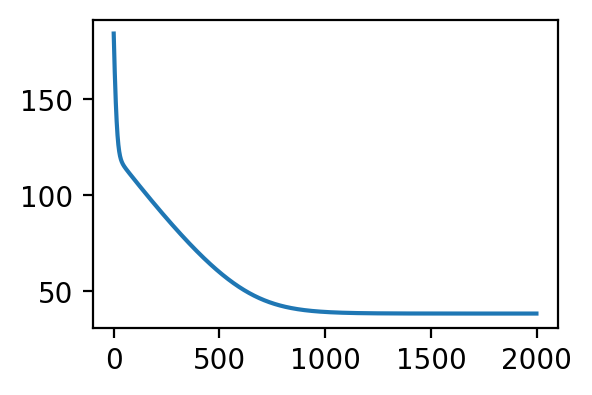

In [30]:
plt.figure(figsize=(3,2))
plt.plot(losses)
plt.show()

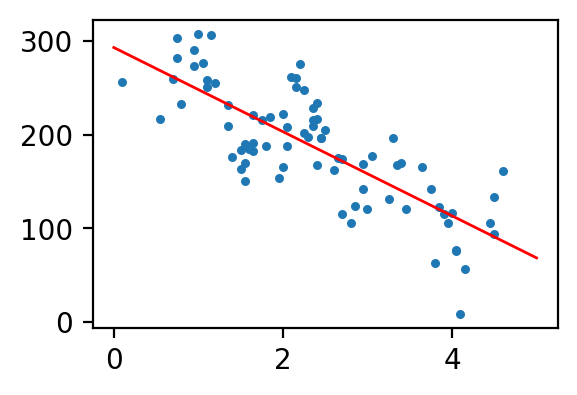

In [37]:
# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.figure(figsize=(3,2))
plt.plot(y, c="r", linewidth=1, markersize=5)


# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'], s=5)
plt.show()

In [38]:
test = pd.read_csv("macbook_test.csv")
print(test.shape)
test.head()

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


In [40]:
test_x = test['used_years'].values
test_y = test['price'].values

In [41]:
prediction = model(test_x, w, b)
test['prediction'] = prediction
test

,used_years,price,prediction
0,1.20,203,239.168506
1,1.85,206,209.965591
2,2.40,191,185.255432
3,2.85,164,165.038030
4,3.05,176,156.052518
5,3.35,136,142.574250
6,2.55,133,178.516298
7,2.60,181,176.269920
8,2.50,181,180.762676
9,3.10,86,153.806140


In [42]:
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,1.20,203,239.168506,-36.168506
1,1.85,206,209.965591,-3.965591
2,2.40,191,185.255432,5.744568
3,2.85,164,165.038030,-1.038030
4,3.05,176,156.052518,19.947482
5,3.35,136,142.574250,-6.574250
6,2.55,133,178.516298,-45.516298
7,2.60,181,176.269920,4.730080
8,2.50,181,180.762676,0.237324
9,3.10,86,153.806140,-67.806140


In [43]:
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

45.03918284717212

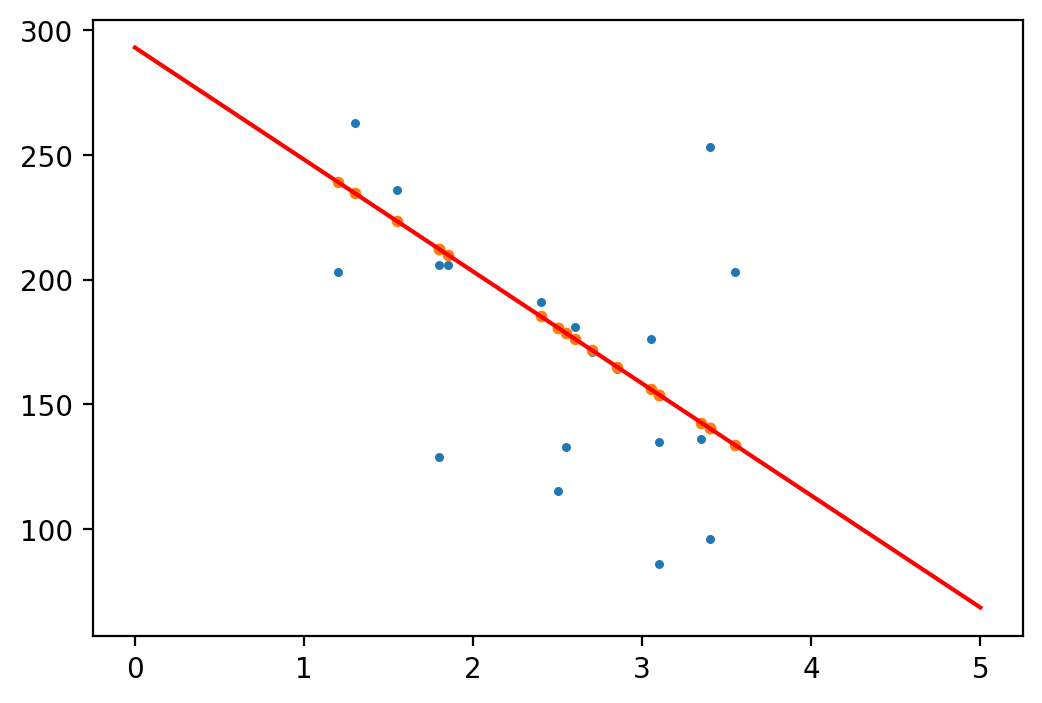

In [47]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)

plt.figure(figsize=(6,4))
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'], s=5)

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'], s=10)
plt.show()

# 1-7

In [48]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [49]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [50]:
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,False,True,False,True,False,False,False,True,False,True
1,10.34,1.66,3,True,False,False,True,False,False,False,True,False,True
2,21.01,3.50,3,True,False,False,True,False,False,False,True,False,True
3,23.68,3.31,2,True,False,False,True,False,False,False,True,False,True
4,24.59,3.61,4,False,True,False,True,False,False,False,True,False,True


In [51]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,False,True,False,True,False,False,False,True,False,True,1.01
1,10.34,3,True,False,False,True,False,False,False,True,False,True,1.66
2,21.01,3,True,False,False,True,False,False,False,True,False,True,3.50
3,23.68,2,True,False,False,True,False,False,False,True,False,True,3.31
4,24.59,4,False,True,False,True,False,False,False,True,False,True,3.61


In [52]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


In [54]:
import numpy as np

W = np.random.rand(12)
b = np.random.rand()

In [55]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [56]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [57]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [58]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [69]:
dW, db = gradient(X, W, b, y)
print("dW:", dW, dW.dtype)
print("db:", db, db.dtype)

dW: [888.1128048197451 107.14485369378102 25.377161183907337
 12.753067440446655 14.781873825614444 23.348354798739557
 8.728121479171811 2.4731859891691306 14.26624362831041 12.662677527702645
 9.250194702462146 28.880033921891837] object
db: 38.130228624354 float64


In [60]:
LEARNING_RATE = 0.0001

In [64]:
type(W.dtype)

numpy.dtype[float64]

In [70]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW.astype(float)
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 55.5874
Iteration 20 : Loss 8.7978
Iteration 30 : Loss 2.9652
Iteration 40 : Loss 2.2356
Iteration 50 : Loss 2.1417
Iteration 60 : Loss 2.1271
Iteration 70 : Loss 2.1223
Iteration 80 : Loss 2.1188
Iteration 90 : Loss 2.1154
Iteration 100 : Loss 2.1121
Iteration 110 : Loss 2.1088
Iteration 120 : Loss 2.1055
Iteration 130 : Loss 2.1022
Iteration 140 : Loss 2.0990
Iteration 150 : Loss 2.0957
Iteration 160 : Loss 2.0925
Iteration 170 : Loss 2.0893
Iteration 180 : Loss 2.0861
Iteration 190 : Loss 2.0829
Iteration 200 : Loss 2.0797
Iteration 210 : Loss 2.0765
Iteration 220 : Loss 2.0733
Iteration 230 : Loss 2.0702
Iteration 240 : Loss 2.0671
Iteration 250 : Loss 2.0639
Iteration 260 : Loss 2.0608
Iteration 270 : Loss 2.0577
Iteration 280 : Loss 2.0546
Iteration 290 : Loss 2.0516
Iteration 300 : Loss 2.0485
Iteration 310 : Loss 2.0455
Iteration 320 : Loss 2.0424
Iteration 330 : Loss 2.0394
Iteration 340 : Loss 2.0364
Iteration 350 : Loss 2.0334
Iteration 360 : Loss 2.0304


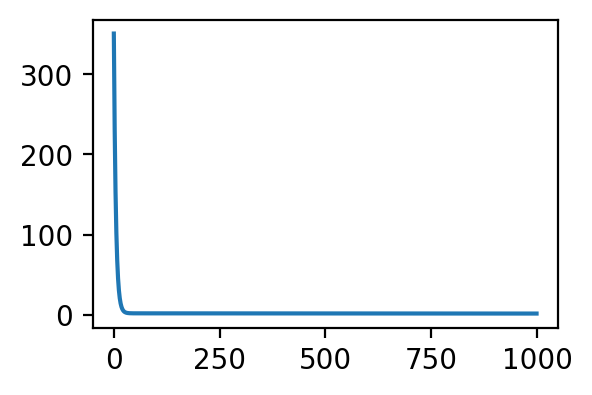

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,2))
plt.plot(losses)
plt.show()

In [72]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

1.6809274964822474

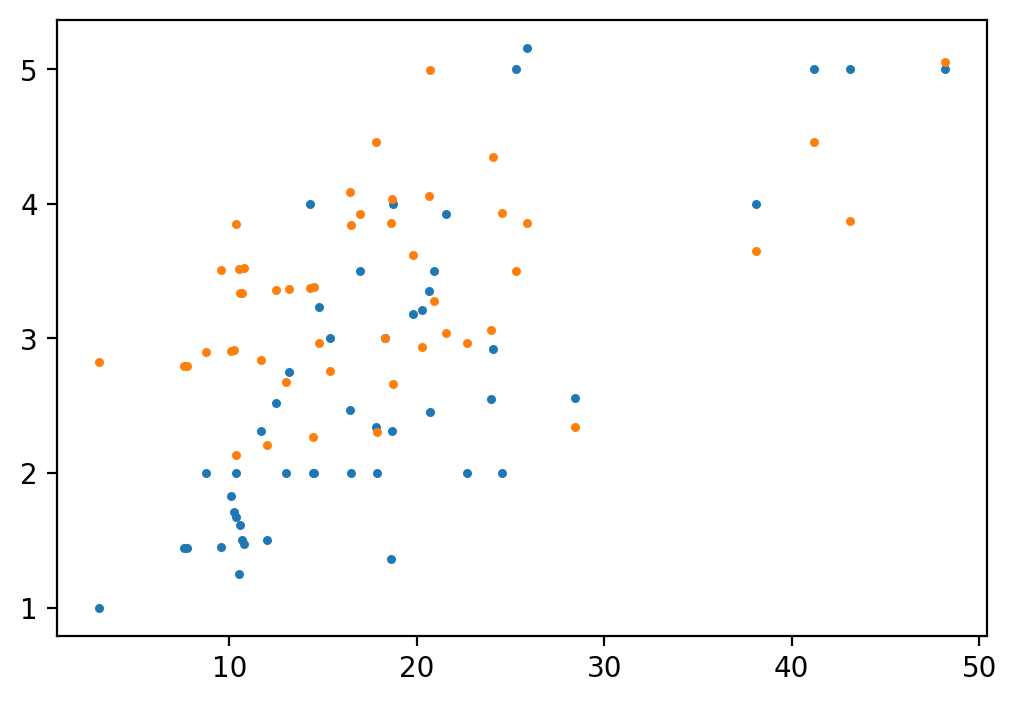

In [74]:
plt.figure(figsize=(6,4))
plt.scatter(X_test[:, 0], y_test, s=5)
plt.scatter(X_test[:, 0], prediction, s=5)
plt.show()

# 1-11

In [76]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]

In [77]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [79]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [80]:
model.fit(X_train, y_train)

LinearRegression()

In [81]:
predictions = model.predict(X_test)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [82]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436105

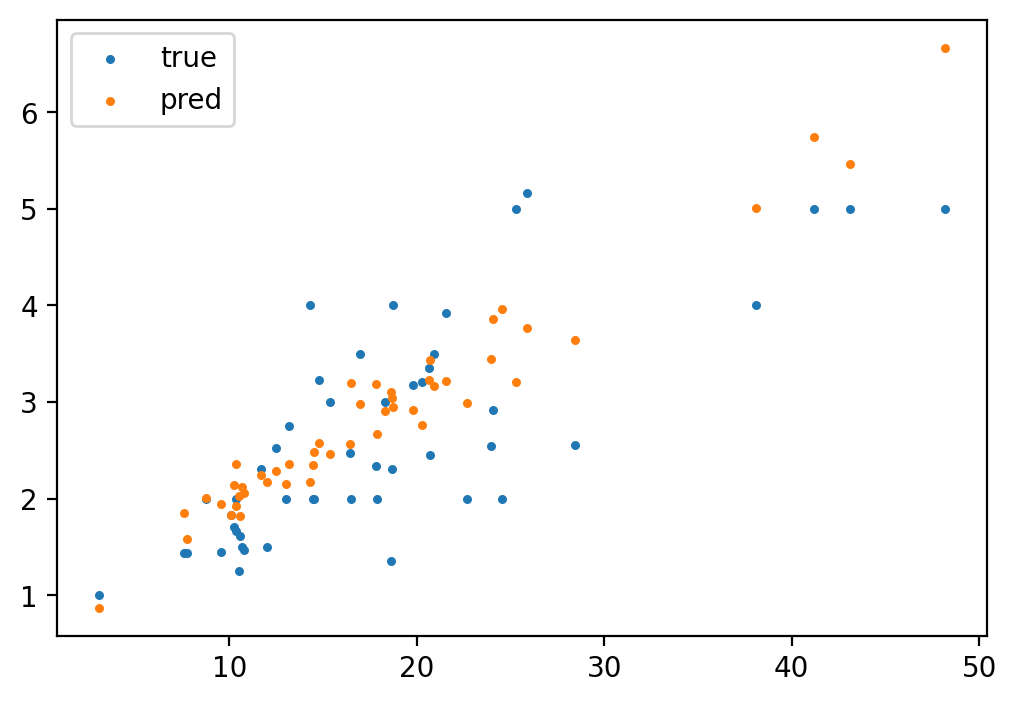

In [83]:
plt.figure(figsize=(6,4))
plt.scatter(X_test[:, 0], y_test, label="true", s=5)
plt.scatter(X_test[:, 0], predictions, label="pred", s=5)
plt.legend()
plt.show()